In [1]:
import numpy
import pandas
import matplotlib
import seaborn
import sklearn

In [2]:
#conda install lightgbm

In [3]:
import lightgbm
#its a machine learnign model
#description :A fast, distributed, high performance gradient boosting (GBDT, GBRT, GBM or MART)
#framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks

We are going to analyse a dataset that is used to predict whether a patient is likely to get stroke 
based on the input parameters like gender, age, various diseases, and smoking status. 
Each row in the data provides relavant information about the patient.

In the first part of the notebook you will see some basic analysis of the set so as to get a better understanding of our data

In this project, we will analyze a dataset that contains information about stroke risk factors for patients. The dataset includes demographic and health-related features, such as gender, age, smoking status, and medical history, which we will use to predict whether a patient is likely to suffer a stroke. Our analysis will involve exploring the data to understand its structure and distributions, identifying any patterns or correlations between the features, and performing machine learning techniques to create predictive models. Our ultimate goal is to present a set of findings that could help healthcare professionals to better understand stroke risks and to improve their prevention and treatment strategies.

In [4]:
#SOS links
#https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset
#https://www.kaggle.com/code/bibekrai44/stroke-prediction-and-analysis

# STROKE DATASET ANALYSIS

In [5]:
mydata = pandas.read_csv('stroke.csv')

In [6]:
mydata 

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [7]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
mydata['smoking_status'].unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

In [9]:
mydata['Residence_type'].value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [10]:
mydata['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

<AxesSubplot: xlabel='stroke', ylabel='count'>

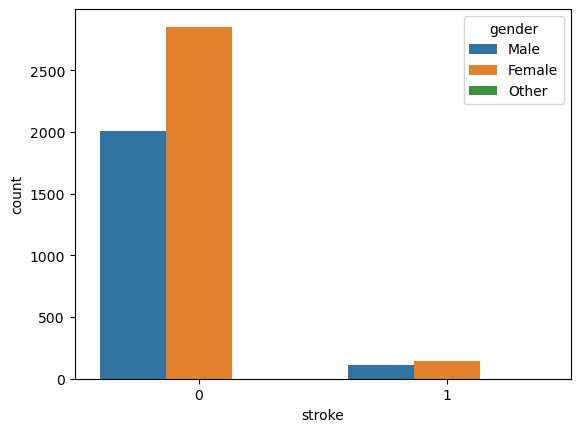

In [11]:
seaborn.countplot(data = mydata, x = 'stroke',hue='gender') #y=count by default

<AxesSubplot: xlabel='stroke', ylabel='count'>

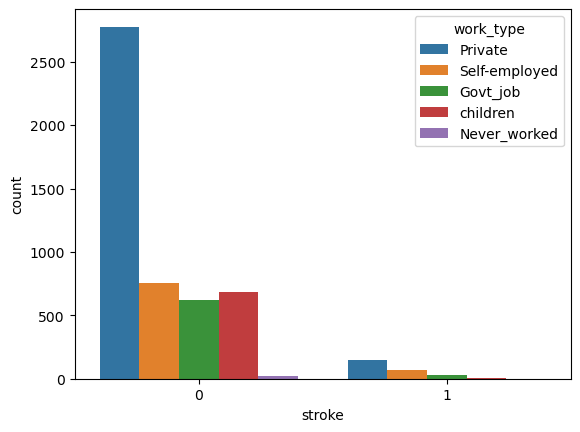

In [12]:
seaborn.countplot(data = mydata, x = 'stroke',hue='work_type')

# MACHINE LEARNING (focused on : CROSS VALIDATION)

In this project, we will analyze a dataset that contains information about stroke risk factors for patients. The dataset includes demographic and health-related features, such as gender, age, smoking status, and medical history, which we will use to predict whether a patient is likely to suffer a stroke. Our analysis will involve exploring the data to understand its structure and distributions, identifying any patterns or correlations between the features, and performing machine learning techniques, including cross-validation methods, to create predictive models. Cross-validation techniques help to evaluate the performance of our models and ensure they are not overfitting to the training data. Our ultimate goal is to present a set of findings that could help healthcare professionals to better understand stroke risks and to improve their prevention and treatment strategies.

Our main purpose is to discover cross validation
we will make algos and test different cross validations
the goal of every algo is unique to find the stroke column values. if somebody is going to have a stroke or not

In [13]:
#first we need to prepare our set

In [14]:
mydata["ever_married"] = mydata["ever_married"].replace("Yes", True).replace("No", False)#converting stirng to bool

In [15]:
#converting all the other string Dtype values to category type. 
mydata["gender"] = mydata["gender"].astype("category") #this could be also boolean
mydata["smoking_status"] = mydata["smoking_status"].astype("category")
mydata["Residence_type"] = mydata["Residence_type"].astype("category")
mydata["work_type"] = mydata["work_type"].astype("category")

In [16]:
mydata.info()#so now we have only numerical and category value types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   id                 5110 non-null   int64   
 1   gender             5110 non-null   category
 2   age                5110 non-null   float64 
 3   hypertension       5110 non-null   int64   
 4   heart_disease      5110 non-null   int64   
 5   ever_married       5110 non-null   bool    
 6   work_type          5110 non-null   category
 7   Residence_type     5110 non-null   category
 8   avg_glucose_level  5110 non-null   float64 
 9   bmi                4909 non-null   float64 
 10  smoking_status     5110 non-null   category
 11  stroke             5110 non-null   int64   
dtypes: bool(1), category(4), float64(3), int64(4)
memory usage: 305.2 KB


In [17]:
#we will add a new column with id of the doctor who is treating the patient
mydata["doctor_id"] = numpy.random.randint(0, 8, size=len(mydata)) #id values[0-7]

In [18]:
#mydata

In [19]:
#alpha = mydata.sample(n=500, random_state=529) this is making a sample of 500 random rows from my dataset
#radom_state is just a generator you can use the same if you want to have the same sample
#or not : alpha = mydata.sample(n=500)

In [20]:
#we are spliting the set to train and holdout. of course there are many ways to do this. this one is just an example
#the one think you have to remember is that statistics says that you MUST do it randomly

holdout_ids = mydata.sample(n=500, random_state=529).index #random sample of 500 indexes!!! (not full row)

In [21]:
#my train set is the old mydata set without those 500 (holdout_ids)
train = mydata.loc[~mydata.index.isin(holdout_ids)] #removies the rows with id in holdout
train = train.sample(frac=1,random_state=529)#shuffling the rows (important in MACHINE LEARNING)
train = train.sort_values("doctor_id").reset_index(drop=True) #new sort new indexes!!
#dont confuse the index of the DataFrame with the column 'id'

In [22]:
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,doctor_id
0,35178,Male,7.0,0,0,False,children,Urban,98.12,20.4,Unknown,0,0
1,69355,Male,3.0,0,0,False,children,Rural,86.38,22.8,Unknown,0,0
2,16587,Female,16.0,0,0,False,Private,Urban,122.26,34.2,never smoked,0,0
3,39639,Female,46.0,0,0,True,Private,Rural,188.11,50.2,smokes,0,0
4,48830,Male,30.0,0,0,True,Private,Urban,104.62,33.5,smokes,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4605,69687,Female,18.0,0,0,False,Self-employed,Rural,93.88,22.2,never smoked,0,7
4606,22952,Female,21.0,0,0,False,Govt_job,Urban,111.61,36.9,smokes,0,7
4607,2692,Female,80.0,0,0,True,Self-employed,Urban,73.87,33.7,never smoked,0,7
4608,29077,Female,77.0,0,0,True,Private,Rural,95.10,35.0,never smoked,0,7


In [23]:
#now that we have understood the code we could write it in oneline to impress the crowd !!
holdout = mydata.loc[mydata.index.isin(holdout_ids)].sample(frac=1, random_state=529).sort_values("doctor_id").reset_index(drop=True)
    

In [24]:
holdout

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,doctor_id
0,69160,Male,59.0,0,0,True,Private,Rural,211.78,NaN,formerly smoked,1,0
1,728,Male,8.0,0,0,False,children,Urban,88.83,18.5,Unknown,0,0
2,18866,Female,75.0,0,0,True,Self-employed,Urban,96.95,41.4,never smoked,0,0
3,38284,Male,8.0,0,0,False,children,Rural,77.08,16.9,Unknown,0,0
4,68224,Male,54.0,0,0,True,Private,Rural,209.50,37.9,formerly smoked,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,59130,Female,27.0,0,0,False,Private,Rural,226.75,28.9,Unknown,0,7
496,70845,Male,73.0,0,1,True,Private,Rural,62.44,25.2,smokes,0,7
497,35432,Female,36.0,0,0,True,Private,Rural,95.36,25.1,never smoked,0,7
498,32840,Female,52.0,0,0,True,Private,Urban,97.32,21.8,smokes,0,7


In [25]:
#DELETE  
"""
def get_X_y(train):
    FEATURES = [
        "gender",
        "age",
        "hypertension",
        "heart_disease",
        "ever_married",
        "work_type",
        "Residence_type",
        "avg_glucose_level",
        "bmi",
        "smoking_status",
    ]

    GROUPS = "doctor_id"

    TARGET = "stroke"

    X = train[FEATURES]
    y = train[TARGET]
    groups = train[GROUPS]
    return X, y, groups
"""

'\ndef get_X_y(train):\n    FEATURES = [\n        "gender",\n        "age",\n        "hypertension",\n        "heart_disease",\n        "ever_married",\n        "work_type",\n        "Residence_type",\n        "avg_glucose_level",\n        "bmi",\n        "smoking_status",\n    ]\n\n    GROUPS = "doctor_id"\n\n    TARGET = "stroke"\n\n    X = train[FEATURES]\n    y = train[TARGET]\n    groups = train[GROUPS]\n    return X, y, groups\n'

In [26]:
#X, y, groups = get_X_y(train)

In [27]:
#a better and smoother one is this:

In [28]:
y_train = train.pop('stroke')
groups = train['doctor_id']

In [29]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
4605    0
4606    0
4607    0
4608    0
4609    0
Name: stroke, Length: 4610, dtype: int64

In [30]:
groups

0       0
1       0
2       0
3       0
4       0
       ..
4605    7
4606    7
4607    7
4608    7
4609    7
Name: doctor_id, Length: 4610, dtype: int32

In [31]:
train

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,doctor_id
0,35178,Male,7.0,0,0,False,children,Urban,98.12,20.4,Unknown,0
1,69355,Male,3.0,0,0,False,children,Rural,86.38,22.8,Unknown,0
2,16587,Female,16.0,0,0,False,Private,Urban,122.26,34.2,never smoked,0
3,39639,Female,46.0,0,0,True,Private,Rural,188.11,50.2,smokes,0
4,48830,Male,30.0,0,0,True,Private,Urban,104.62,33.5,smokes,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4605,69687,Female,18.0,0,0,False,Self-employed,Rural,93.88,22.2,never smoked,7
4606,22952,Female,21.0,0,0,False,Govt_job,Urban,111.61,36.9,smokes,7
4607,2692,Female,80.0,0,0,True,Self-employed,Urban,73.87,33.7,never smoked,7
4608,29077,Female,77.0,0,0,True,Private,Rural,95.10,35.0,never smoked,7


In [32]:
#better names for the variables are:
xTrain = train
yTrain =y_train
groupsTrain =groups

In [33]:
machineLIGHTGBM = lightgbm.LGBMClassifier(n_estimators=100)#our model using lightgmb classifier
#i like to call the training models machines , of course you can choose something better than this

In [34]:
#its very simple to train it:
machineLIGHTGBM.fit(xTrain,yTrain)

LGBMClassifier()

In [35]:
#now the predictons
#1st lets look at  the predict method which gives us 0-1 values 
predictions = machineLIGHTGBM.predict(xTrain)

In [36]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [37]:
len(predictions)

4610

In [38]:
#for i in predictions:           #NO NEED to do this, believe me its a banch of zeros and aces(0,1)
#    print(i)

In [39]:
#but we can also ask for probabilites of 0-1 by using the method predict_proba
predictionsProbabilites = machineLIGHTGBM.predict_proba(xTrain)

In [40]:
predictionsProbabilites
#first value = 0 probabilty and the second one is the 1 probability
#1=stroke (reminder)

array([[9.99956064e-01, 4.39362087e-05],
       [9.99968359e-01, 3.16411568e-05],
       [9.99909837e-01, 9.01630471e-05],
       ...,
       [9.25220341e-01, 7.47796594e-02],
       [9.82906573e-01, 1.70934273e-02],
       [9.98692376e-01, 1.30762360e-03]])

In [41]:
#we could also keep only the column with the probability to have a stroke
strokeProbability = predictionsProbabilites[:, 1]

In [42]:
strokeProbability

array([4.39362087e-05, 3.16411568e-05, 9.01630471e-05, ...,
       7.47796594e-02, 1.70934273e-02, 1.30762360e-03])

In [43]:
#help:    1.88019638e-02 = 0.0188019638   (move the comma(,) left , as many times as the negative power of e)
#so the first person has a 0.018 possibility to have a stroke , 
#if we run the predict method this would be a zero(0)

In [44]:
accScore = sklearn.metrics.accuracy_score(yTrain, predictions)

In [45]:
accScore #superb score !! its very rare to see that rate of accuracy

0.9978308026030369

In [46]:
metrics = sklearn.metrics.confusion_matrix(yTrain,predictions)

In [47]:
metrics

array([[4387,    0],
       [  10,  213]], dtype=int64)

In [48]:
#check confusion matrix image first 
#4387 = the machine predicted (0) and the actual value was (0)
#11 = tha machine predicted (0) and the actual value was(1)
#0 = the machine predicted (1) and the actual values was (0)
#212 = the machine predicted (1) and the actual value was (1)

In [49]:
aucScore = sklearn.metrics.roc_auc_score(yTrain ,strokeProbability)
#important : to use this metric we need the stroke probability and not the predictionsProbabilities which has two values 
#auc = area under the curve(google it if you want to know more about this statistic value (or gpt it :D))
#its similar to accuracy for probabilites

In [50]:
aucScore

1.0

Amazing accuracy rates!!!  ... ... ... are they ? 

In [51]:
#lets check now the holdout set(test set)

In [52]:
holdout #lets say it test
testSet = holdout
testSet

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,doctor_id
0,69160,Male,59.0,0,0,True,Private,Rural,211.78,NaN,formerly smoked,1,0
1,728,Male,8.0,0,0,False,children,Urban,88.83,18.5,Unknown,0,0
2,18866,Female,75.0,0,0,True,Self-employed,Urban,96.95,41.4,never smoked,0,0
3,38284,Male,8.0,0,0,False,children,Rural,77.08,16.9,Unknown,0,0
4,68224,Male,54.0,0,0,True,Private,Rural,209.50,37.9,formerly smoked,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,59130,Female,27.0,0,0,False,Private,Rural,226.75,28.9,Unknown,0,7
496,70845,Male,73.0,0,1,True,Private,Rural,62.44,25.2,smokes,0,7
497,35432,Female,36.0,0,0,True,Private,Rural,95.36,25.1,never smoked,0,7
498,32840,Female,52.0,0,0,True,Private,Urban,97.32,21.8,smokes,0,7


In [53]:
yTest=testSet.pop('stroke')

In [54]:
xTest=testSet
yTest
testSet

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,doctor_id
0,69160,Male,59.0,0,0,True,Private,Rural,211.78,NaN,formerly smoked,0
1,728,Male,8.0,0,0,False,children,Urban,88.83,18.5,Unknown,0
2,18866,Female,75.0,0,0,True,Self-employed,Urban,96.95,41.4,never smoked,0
3,38284,Male,8.0,0,0,False,children,Rural,77.08,16.9,Unknown,0
4,68224,Male,54.0,0,0,True,Private,Rural,209.50,37.9,formerly smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,59130,Female,27.0,0,0,False,Private,Rural,226.75,28.9,Unknown,7
496,70845,Male,73.0,0,1,True,Private,Rural,62.44,25.2,smokes,7
497,35432,Female,36.0,0,0,True,Private,Rural,95.36,25.1,never smoked,7
498,32840,Female,52.0,0,0,True,Private,Urban,97.32,21.8,smokes,7


In [55]:
predictions2 = machineLIGHTGBM.predict(xTest)
predictionsProbabilites2=machineLIGHTGBM.predict_proba(xTest)
strokeProbability2 = predictionsProbabilites2[:, 1]


accScore2 = sklearn.metrics.accuracy_score(yTest, predictions2)
aucScore2 = sklearn.metrics.roc_auc_score(yTest, strokeProbability2)

In [56]:
accScore2

0.95

In [57]:
aucScore2

0.7830249918857514

In [58]:
#hmmmm no more 99s right?

In [59]:
mymetrics = sklearn.metrics.classification_report(yTest,predictions2)

In [60]:
print(mymetrics)

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       474
           1       0.60      0.12      0.19        26

    accuracy                           0.95       500
   macro avg       0.78      0.56      0.58       500
weighted avg       0.94      0.95      0.93       500



In [61]:
yTest.value_counts()
#we have to check the set to understand what is going on
#the set is not balanced  , the most prices are ZEROS

0    474
1     26
Name: stroke, dtype: int64

In [62]:
#so lets predict only zeros to see our accuracy
accScoreZERO = sklearn.metrics.accuracy_score(yTest, numpy.zeros_like(yTest))
aucScoreZERO = sklearn.metrics.roc_auc_score(yTest, numpy.zeros_like(yTest))
#numpy.zeros_like(yTest) creates an numpy arrray with len=len(yTest) with zeros

In [65]:
accScoreZERO

0.948

In [66]:
aucScoreZERO

0.5

In [71]:
#not bad !! :D :D: :D 
#coin flipping possibilities

In [72]:
#lets try to fix the model 
#first of all we have to perform a proper train-test split to our data(our train data)

In [73]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(xTrain , yTrain , test_size=0.1)#10% of our data will be the test set

In [74]:
machineLIGHTGBM = lightgbm.LGBMClassifier(n_estimators=100,max_depth=3)#max depth = 

In [75]:
machineLIGHTGBM.fit(X_train,y_train) #training the  model

LGBMClassifier(max_depth=3)

In [76]:
predictions3 = machineLIGHTGBM.predict(X_test)

In [77]:
predictionsProbabilites3 = machineLIGHTGBM.predict_proba(X_test)[:,1] #one line this time (no stroke probability)

In [78]:
accScore3 = sklearn.metrics.accuracy_score(y_test,predictions3)
accScore3

0.9479392624728851

In [79]:
aucScore3  =sklearn.metrics.roc_auc_score(y_test,predictionsProbabilites3)
aucScore3

0.7909992372234935

# CROSS VALIDATION
CV provides the ability to estimate model performance on unseen data not used while training.

some theory first , there are several cross validation methos :
1)KFold , kanei train test split alla oxi mono mia fora. oses fores tou poume , opote exoume polla diaforetika splits tou dataset
2)Stratified KFold idio pragma alla prospathei to train kai to test split na einai balanced. px min einai to ena set mono me midenika
poli xrisimo otan to arxiko dataset einai unbalanced
3)Group KFold , paromoio me ta proigoumena kai to protimame otan iparxoun groups sta data
px se emas group einai to id tou giatrou(exoume 8 groups ena gia kathe giatro). me to GRoyupKFold to modelo den ephreazetai stis problepseis tou
apo ayta ta groups(sinithos ta krataei ola mazi eite sto trainig eite sto test set wste na mhn einai biased)
4)Stratified Group KFold. sindiasmos twn 2 kai 3

There are more like TimeSeriesSplit but its pretty much uselles to our DataSet so we will cover them in another project

In [80]:
#the cell below is for the visualization of the graphic plots of the Cross Validation 
#dont mess with it
#the code is taken from here :
#https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [81]:
#kane ola ta nympy kai ta matplotlib
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
cmap_data = plt.cm.Paired
cmap_cv = plt.cm.coolwarm

def visualize_groups(classes, groups, name):
    # Visualize dataset groups
    fig, ax = plt.subplots()
    ax.scatter(
        range(len(groups)),
        [0.5] * len(groups),
        c=groups,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.scatter(
        range(len(groups)),
        [3.5] * len(groups),
        c=classes,
        marker="_",
        lw=50,
        cmap=cmap_data,
    )
    ax.set(
        ylim=[-1, 5],
        yticks=[0.5, 3.5],
        yticklabels=["Data\ngroup", "Data\nclass"],
        xlabel="Sample index",
    )


def plot_cv_indices(cv, X, y, group, ax, n_splits, lw=25):
    """Create a sample plot for indices of a cross-validation object."""

    # Generate the training/testing visualizations for each CV split
    for ii, (tr, tt) in enumerate(cv.split(X=X, y=y, groups=group)):
        # Fill in indices with the training/test groups
        indices = np.array([np.nan] * len(X))
        indices[tt] = 1
        indices[tr] = 0

        # Visualize the results
        ax.scatter(
            range(len(indices)),
            [ii + 0.5] * len(indices),
            c=indices,
            marker="_",
            lw=lw,
            cmap=cmap_cv,
            vmin=-0.2,
            vmax=1.2,
        )

    # Plot the data classes and groups at the end
    ax.scatter(
        range(len(X)), [ii + 1.5] * len(X), c=y, marker="_", lw=lw, cmap=cmap_data
    )

    ax.scatter(
        range(len(X)), [ii + 2.5] * len(X), c=group, marker="_", lw=lw, cmap=cmap_data
    )

    # Formatting
    yticklabels = list(range(n_splits)) + ["class", "group"]
    ax.set(
        yticks=np.arange(n_splits + 2) + 0.5,
        yticklabels=yticklabels,
        xlabel="Sample index",
        ylabel="CV iteration",
        ylim=[n_splits + 2.2, -0.2],
        xlim=[0, 100],
    )
    ax.set_title("{}".format(type(cv).__name__), fontsize=15)
    return ax


def plot_cv(cv, X, y, groups, n_splits=5):
    this_cv = cv(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(15, 5))
    plot_cv_indices(this_cv, X, y, groups, ax, n_splits)

    ax.legend(
        [Patch(color=cmap_cv(0.8)), Patch(color=cmap_cv(0.02))],
        ["Testing set", "Training set"],
        loc=(1.02, 0.8),
    )
    plt.tight_layout()
    fig.subplots_adjust(right=0.7)
    plt.show()
    
def get_fake_X_y():
    # Fake Generate the class/group data for an example
    n_points = 100
    X_ = np.random.randn(100, 10)

    percentiles_classes = [0.1, 0.9]
    y_ = np.hstack([[ii] * int(100 * perc) for ii, perc in enumerate(percentiles_classes)])

    # Evenly spaced groups repeated once
    groups_ = np.hstack([[ii] * 10 for ii in range(10)])
    return X_, y_, groups_

here is a visual presentation of the Cross Validation methods we talked about : 

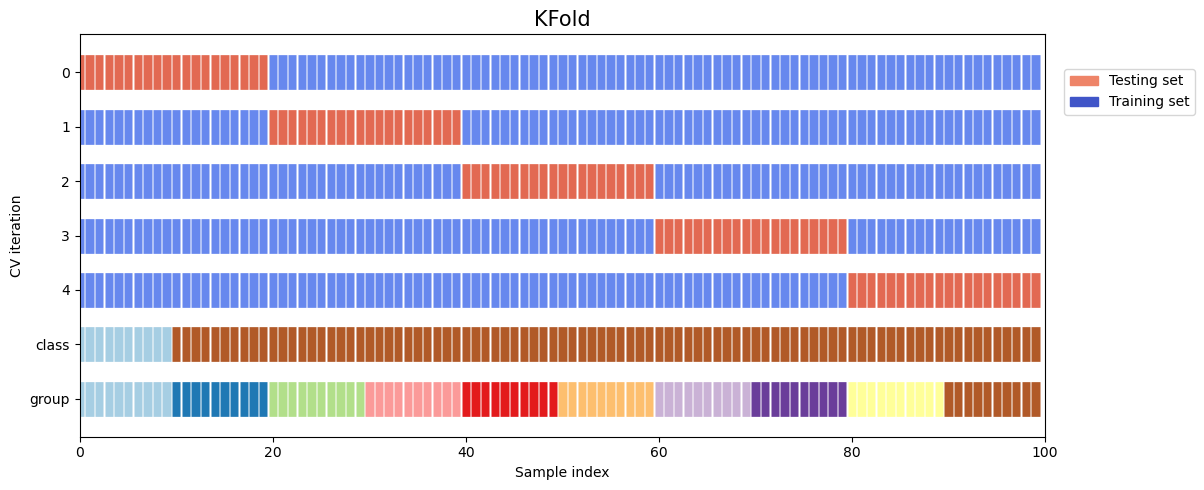

In [82]:
kf = sklearn.model_selection.KFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(sklearn.model_selection.KFold, X_, y_, groups_)

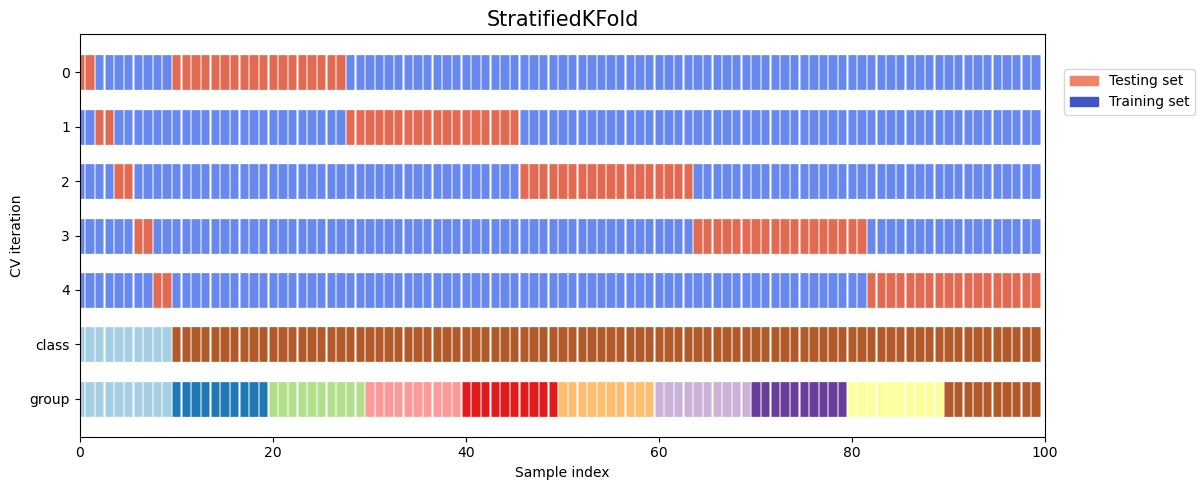

In [83]:
skf = sklearn.model_selection.StratifiedKFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(sklearn.model_selection.StratifiedKFold, X_, y_, groups_)

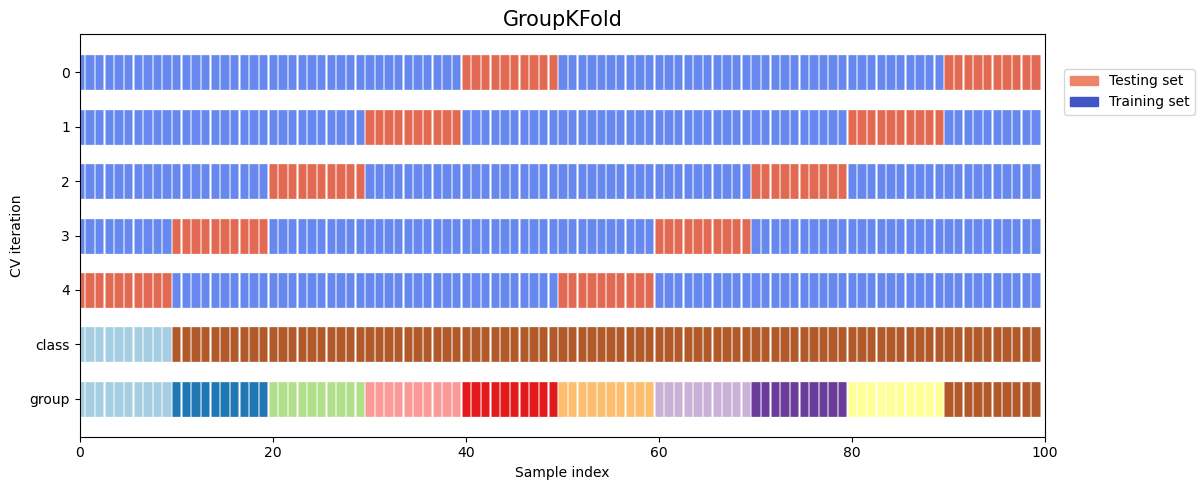

In [84]:
gkf = sklearn.model_selection.GroupKFold()
X_, y_, groups_ = get_fake_X_y()
plot_cv(sklearn.model_selection.GroupKFold, X_, y_, groups_)

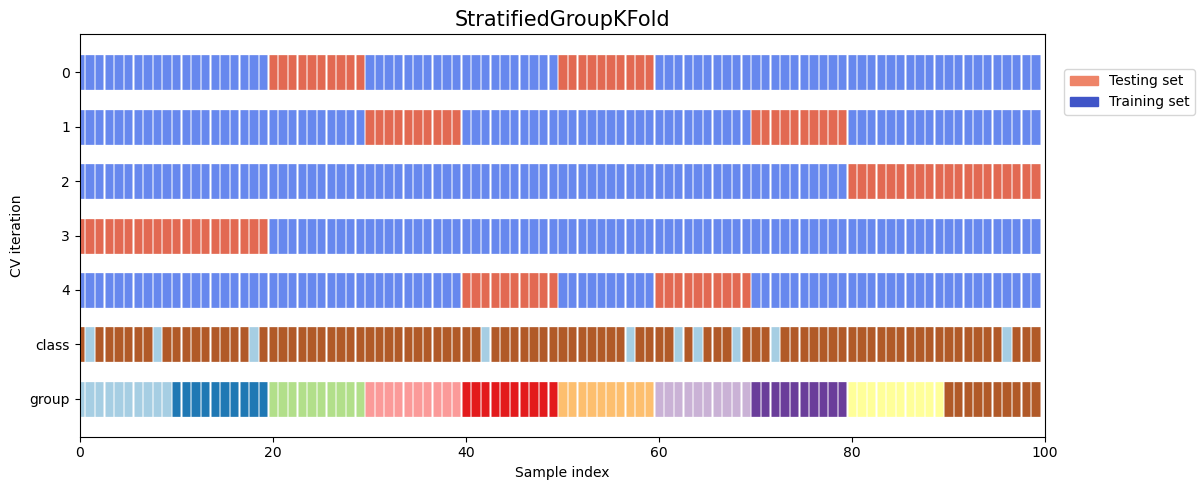

In [85]:
gskf = sklearn.model_selection.StratifiedGroupKFold()
X_, y_, groups_ = get_fake_X_y()
np.random.shuffle(y_)
plot_cv(sklearn.model_selection.StratifiedGroupKFold, X_, y_, groups_)

In [86]:
#Now lets pick the best method for our dataset.
#As i always say the hardest part of data analysis and machine learnign is to deeply understand your dataset
#our dataset is pretty small , unbalanced and has groups(well it doesnt but we added them with the doctor id column) 

#so the winner is : StratifiedGroupFold

In [87]:
machinceSGK = sklearn.model_selection.StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=529)
#n_splits the number of  splits we are going to perform (5 is always a good one to pick)
#Shuffling? sure why not? its not gonna melt

In [88]:
#xTrain
#yTrain
#groups

In [89]:
machinceSGK.split(xTrain, yTrain, groups)#this is doing the split
#the output is indexes. gives us which indexes are for train sets and which for the test set

<generator object _BaseKFold.split at 0x0000016EAE5EB120>

In [90]:
#trexw prwta to palio modelo gia to xyTEST Set

In [91]:
machineLGBMC1_5 = lightgbm.LGBMClassifier(n_estimators=100)
machineLGBMC1_5.fit(xTrain, yTrain)
predictions = machineLGBMC1_5.predict(xTest)
predictionsProbabilites= machineLGBMC1_5.predict_proba(xTest)[:, 1]
acc_score1_5 = sklearn.metrics.accuracy_score(yTest, predictions)
auc_score1_5 = sklearn.metrics.roc_auc_score(yTest, predictionsProbabilites)

In [92]:
acc_score1_5

0.95

In [93]:
auc_score1_5

0.7830249918857514

In [94]:
#to use it properly:
#everything will be putted in a for loop 



rep = 1
aucs = []
acc = []
for train_index, val_index in machinceSGK.split(xTrain, yTrain, groups):#one for every split (5 in total)
    X_tr = xTrain.loc[train_index]
    y_tr = yTrain.loc[train_index]
    
    X_val = xTrain.loc[val_index]
    y_val = yTrain.loc[val_index]

    # Fit Model on Train
    #print(X_tr)
    machineLGBMC = lightgbm.LGBMClassifier(n_estimators=100)
    machineLGBMC.fit(X_tr, y_tr)
    predictions = machineLGBMC.predict(X_val)
    predictionsProbabilites= machineLGBMC.predict_proba(X_val)[:, 1]
    acc_score = sklearn.metrics.accuracy_score(y_val, predictions)
    auc_score = sklearn.metrics.roc_auc_score(y_val, predictionsProbabilites)
    print(f"======= Fold {rep} ========")
    print(
        f"Our accuracy on the validation set is {acc_score:0.4f} and AUC is {auc_score:0.4f}"
    )
    rep=rep+1
    aucs.append(auc_score)
    acc.append(acc_score)
aucMean = np.mean(aucs)
accMean = np.mean(acc)
print(f'Our out of fold AUC score is {aucMean:0.4f}')
print(f'Our out of fold ACC score is {accMean:0.4f}')


======= Fold 1 ========
Our accuracy on the validation set is 0.9439 and AUC is 0.8244
======= Fold 2 ========
Our accuracy on the validation set is 0.9565 and AUC is 0.8350
======= Fold 3 ========
Our accuracy on the validation set is 0.9486 and AUC is 0.8026
======= Fold 4 ========
Our accuracy on the validation set is 0.9411 and AUC is 0.8266
======= Fold 5 ========
Our accuracy on the validation set is 0.9503 and AUC is 0.8965
Our out of fold AUC score is 0.8370
Our out of fold ACC score is 0.9481


In [95]:
#now these metrics are much more accurate! 

In [96]:
#now lets test our model again for the evaluation set 

In [97]:
#xTest=xTest.drop(['id','doctor_id'],axis=1)
#to kanw auto giati kai to sklearn.model_selection.StratifiedGroupKFold petaei ta id kai ta doctor id
#checkare to print mesa sto for loop na deis oti ontws to kanei
predictions = machineLGBMC.predict(xTest)
predictionsProbabilites= machineLGBMC.predict_proba(xTest)[:, 1]
acc_score = sklearn.metrics.accuracy_score(yTest, predictions)
auc_score = sklearn.metrics.roc_auc_score(yTest, predictionsProbabilites)

In [98]:
acc_score

0.946

In [96]:
auc_score

0.7581953911067836

In [99]:
#new machine

In [100]:
machineLGBMC2 = lightgbm.LGBMClassifier(n_estimators=100)
machineLGBMC2.fit(xTrain, yTrain)
predictions = machineLGBMC2.predict(xTest)
predictionsProbabilites= machineLGBMC2.predict_proba(xTest)[:, 1]
acc_score2 = sklearn.metrics.accuracy_score(yTest, predictions)
auc_score2 = sklearn.metrics.roc_auc_score(yTest, predictionsProbabilites)

In [101]:
acc_score2

0.95

In [102]:
auc_score2

0.7830249918857514